## Szembeszállni az istenekkel

Kürt, AI

Varga József

Bevezető, RL, AI, nincs róla szó előadáson, ennek ellenére kihívás volt.

<div>
<img src="img/borito-szembe.jpeg" width="500"/>
</div>

In [ ]:
Aktuális a könyv, pl kapunk-e fertőzést, vagyünk-e lottót. Valószínűség számítás története. 

## Hogy lehet ilyen rossz lapom?  Ötször!!

![](img/hand-cards.jpeg)

![](img/cat.png)

![](img/boszi.png)

![](img/dice.png)

## Mocsár kártya játék

- Több játékos
- Előre kiosztott pakli
- Nyer, akinek elfogy a kezéből a lap
- Egyforma értékű lap tehető le: ♠8,♣8,♠8
- Azonos számú, de nagyobb értékű lappal felülüthető: ♠9,♣9,**
- Utolsóként ütő új kört kezd

Szabályok ismertetése

## Üzleti probléma

Mi a valószínűsége, hogy pocsék lapom van ötször *egymás után*?
![](img/busiprob.png)

## Probléma lebontása

Mi a valószínűsége, hogy egyszer pocsék lapom van?

$P(rossz_5) = P(rossz_1)^5$

In [ ]:
rosszlap=0
for _ in range(5000):
    if rossz(generalt_kartya() ):
        rosszlap +=1
print (rosszlap / 5000)

## Nehézségek a problémával kapcsolatban

* Leosztás nem önmagában rossz, hanem a *többiekéhez képest*. Azaz mi a környezete.
* Hogyan lehet meghatározni: __rossz__()

## Megoldási lehetőség

Program játszik emberi játékosok helyett egy leosztással

![](img/cardgame.png)

In [ ]:
Nincs empirikus kiértékelés a rossz()-ra, közelítsük statisztikusan, lejátszott játszmákkal.

## Kürt, bevezető előadás

![](img/ml.png)

## Elmélet

![](img/rlbook.png)

Levente ajánlotta könyv. Jó elméleti kiindulás. Egyszerű modellek, Alpha Go.

## Reinforcement Learining

![](img/rlmodel.png)

RL általános modell, Agent / környezet, Akció befolyásol, Jutalom, állapot, visszahat.

## MDP:Markov Decision Process

![](img/mdp.png)

S_x állapotok; a_1, a_2 akciók; kék jutalom. 

## Bellman Equation

![](img/belman.png)

v: állapot értéke egy policyra nézve; G_t várható jutalmak összege; \gamma: discount rate

## Bellman Equation, megoldás

* Megoldható, kis s állapottérre
* Feltéve, hogy ismert π, P(s’ , r |a, s)
* Kártyajátékok állapottere nagy, $10^{20}$ … $10^{163}$

### Póker: $10^{20}$

![](img/poker.png)

### UNO / Solo: $10^{163}$

![](img/uno.png)

### Mocsár: kb $10^{50}$

110!/4!^26 = 
20674040388434753750315816000098094250793190673424172763

39068166552154482657050504344815991383640813244707788451

25742000000000000000000


Nem minden állapot érhető el legálisan a RAS kódolásban.

## RLCard.org : http://rlcard.org/

Reinforcement Learning in Card games
![](img/rlcardorg.png)

### Paper: https://arxiv.org/abs/1910.04376

![](img/rlcardarxiv.png)

## Github, RLCard3: https://github.com/cogitoergoread/rlcard3

PyCharm

![](img/rlcardarch.png)

### Lássuk a medvét!

https://github.com/cogitoergoread/rlcard3

## Eredmények

Agentek egymás ellen játszott partijainak eredményei alapján.

In [1]:
import io
from urllib.request import urlopen
import pandas as pd

r = urlopen('https://github.com/cogitoergoread/rlcard3/raw/master/jupyter/data/CAS2_110_MMRR_500_20200405-113309.csv.gz')
df = pd.read_csv(io.BytesIO(r.read()), compression='gzip', sep=";")
print(df)

       Unnamed: 0  cardnr  gamenr  playerid agentid agentstr  payoff
0               0      15       1         0       R     MMRR    -1.0
1               1      15       1         1       R     MMRR     1.0
2               2      15       1         2       M     MMRR     0.5
3               3      15       1         3       M     MMRR    -0.5
4               4      15       2         0       R     MMRR    -0.5
...           ...     ...     ...       ...     ...      ...     ...
25995       25995     110     499         3       M     MMRR     0.5
25996       25996     110     500         0       R     MMRR     1.0
25997       25997     110     500         1       R     MMRR    -1.0
25998       25998     110     500         2       M     MMRR     0.5
25999       25999     110     500         3       M     MMRR    -0.5

[26000 rows x 7 columns]


### Vizualizáció

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
def create_plots(df: pd.DataFrame, agentstr: str, title: str, is_violin: bool, filename: str):
    """
    Create nice figures from the played data
    :param title: Tilte of the figure
    :param df: DataFrame containing the logs of the games
    :param agentstr: Which type of data to display
    :param is_violin: Violin / line graph
    :param filename: filename to store the fihure
    """
    sns.set(rc={'figure.figsize':(12,7)})
    if is_violin:
        _ = sns.violinplot(x="cardnr", y="payoff", data=df[(df['agentstr'] == agentstr)], hue="agentid",
                           split=True).set_title(title)
    else:
        _ = sns.relplot(x="cardnr", y="payoff", kind="line", data=df[(df['agentstr'] == agentstr)], hue="agentid")
        plt.title(title)
    
    plt.show()


## Baseline Random agent vs Min agent, payoff distribution

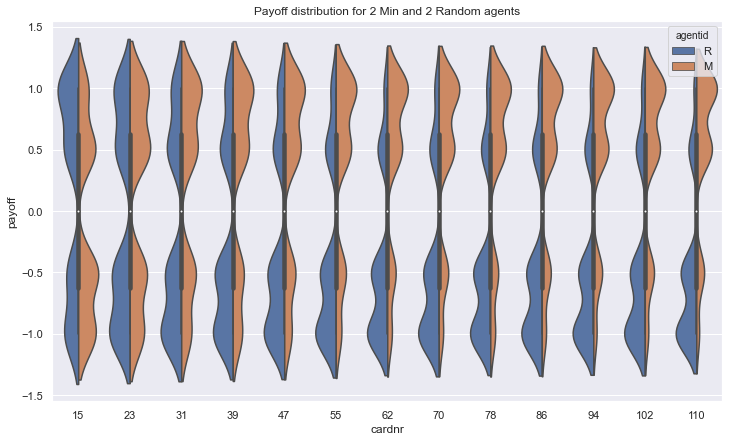

In [14]:

create_plots(df, 'MMRR', "Payoff distribution for 2 Min and 2 Random agents", True, "Ag2vs2V")

## Baseline Random agent vs Min agent, mean payoff

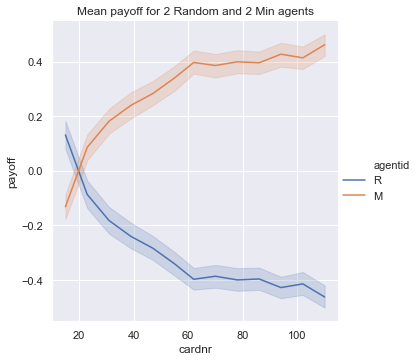

In [15]:
create_plots(df, 'MMRR', "Mean payoff for 2 Random and 2 Min agents", False, "Ag2vs2L")

## RL DQN agent vs Random agent, payoff distribution